# FLIGHT DELAY PROPAGATION

#Data retrival

###Import the necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Load the dataset

In [ ]:
df = pd.read_excel('/content/Propagation_Data.xls')
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,ZNZ - Ground Handling Punctuality (01/09/2023 - 30/09/2024 - Detail),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scheduled,NaN,Actual,NaN,NaN,Turn - around time,NaN,NaN,Non Reactionary Delays,NaN
6,Date,Origin/VIA/Destination,NaN,NaN,NaN,NaN,AC,Reg-ID,Time of,Time of,Time of,NaN,Time of,Minimum,Scheduled,Achieved,Total,Break Down
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arrival,Departure,Arrival,NaN,Departure,NaN,NaN,NaN,NaN,NaN
8,18/04,KQ310 -KQ311D/NBO -AAN -NBO,NaN,NaN,NaN,NaN,333,9H-HFI,(-2)20:25,11:00,(-2)20:35,NaN,13:46,00:45,38:35,41:11,02:46,02:46/FP
9,02/09,KQ520 -KQ520 /NBO -ABJ -DSS,NaN,NaN,NaN,NaN,73H,5Y-CYE,11:20,12:20,11:44,NaN,13:00,00:45,01:00,01:16,00:40,00:40/AM


###Data Understanding

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'ZNZ - Ground Handling Punctuality (01/09/2023 - 30/09/2024 - Detail)',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [ ]:
df.shape

(50057, 18)

The data was obtained using a system that monitors flight departures and arrivals into their destination airport. The data has 18 attributes and about 50K+ number of records. The inbound and outbound flights are grouped into one record for ease of tracking the flight path.

##Data Cleaning

###Rename the ambiguous columns

In [ ]:
df1 = df.rename(columns={'Unnamed: 0': 'Date',
                        'Unnamed: 1': 'Origin/VIA/Destination',
                        'Unnamed: 2': 'Unnamed: 2',
                        'Unnamed: 3': 'Unnamed: 3',
                        'ZNZ - Ground Handling Punctuality (01/09/2023 - 30/09/2024 - Detail)': 'Unnamed 4',
                        'Unnamed: 5': 'new_col1',
                        'Unnamed: 6': 'AC',
                        'Unnamed: 7': 'Reg_ID',
                        'Unnamed: 8': 'Sched_ARR',
                        'Unnamed: 9': 'Sched_DEP',
                        'Unnamed: 10': 'Actual_ARR',
                        'Unnamed: 11': 'new_col1',
                        'Unnamed: 12': 'Actual_DEP',
                        'Unnamed: 13': 'TAT_Min',
                        'Unnamed: 14': 'TAT_Sched',
                        'Unnamed: 15': 'TAT_Achieved',
                        'Unnamed: 16': 'Total_NR_Delay',
                        'Unnamed: 17': 'NR_breakdown'})

df1.head(20)

,Date,Origin/VIA/Destination,Unnamed: 2,Unnamed: 3,Unnamed 4,new_col1,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,new_col1,Actual_DEP,TAT_Min,TAT_Sched,TAT_Achieved,Total_NR_Delay,NR_breakdown
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scheduled,NaN,Actual,NaN,NaN,Turn - around time,NaN,NaN,Non Reactionary Delays,NaN
6,Date,Origin/VIA/Destination,NaN,NaN,NaN,NaN,AC,Reg-ID,Time of,Time of,Time of,NaN,Time of,Minimum,Scheduled,Achieved,Total,Break Down
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arrival,Departure,Arrival,NaN,Departure,NaN,NaN,NaN,NaN,NaN
8,18/04,KQ310 -KQ311D/NBO -AAN -NBO,NaN,NaN,NaN,NaN,333,9H-HFI,(-2)20:25,11:00,(-2)20:35,NaN,13:46,00:45,38:35,41:11,02:46,02:46/FP
9,02/09,KQ520 -KQ520 /NBO -ABJ -DSS,NaN,NaN,NaN,NaN,73H,5Y-CYE,11:20,12:20,11:44,NaN,13:00,00:45,01:00,01:16,00:40,00:40/AM


###Dropping the unnecessary columns and  empty head rows

In [ ]:
df2 = df1.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed 4',	'new_col1',	])
df2 = df2.iloc[8:]
df2 = df2.reset_index(drop=True)  # Resets the index to start from 0
df2.head(20)

,Date,Origin/VIA/Destination,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,Actual_DEP,TAT_Min,TAT_Sched,TAT_Achieved,Total_NR_Delay,NR_breakdown
0,18/04,KQ310 -KQ311D/NBO -AAN -NBO,333,9H-HFI,(-2)20:25,11:00,(-2)20:35,13:46,00:45,38:35,41:11,02:46,02:46/FP
1,02/09,KQ520 -KQ520 /NBO -ABJ -DSS,73H,5Y-CYE,11:20,12:20,11:44,13:00,00:45,01:00,01:16,00:40,00:40/AM
2,02/09,KQ521 -KQ521 /DSS -ABJ -NBO,73H,5Y-CYE,19:20,20:20,19:58,21:23,00:45,01:00,01:25,00:23,00:23/TU
3,05/09,KQ520 -KQ520 /NBO -ABJ -DSS,73H,5Y-CYD,11:20,12:20,11:42,12:46,00:45,01:00,01:04,00:00,NaN
4,05/09,KQ521 -KQ521 /DSS -ABJ -NBO,73H,5Y-CYD,19:20,20:20,19:40,20:52,00:45,01:00,01:12,00:25,"00:19/RIS,00:06/AT"
5,06/09,KQ520 -KQ520 /NBO -ABJ -DSS,73H,5Y-CYD,11:20,12:20,13:42,14:26,00:45,01:00,00:44,02:06,02:06/RE
6,06/09,KQ521 -KQ521 /DSS -ABJ -NBO,73H,5Y-CYD,19:20,20:20,21:16,22:35,00:45,01:00,01:19,02:15,"00:29/GZ,01:46/RE"
7,07/09,KQ520 -KQ520 /NBO -ABJ -DSS,73H,5Y-KYD,11:20,12:20,11:14,12:19,00:45,01:00,01:05,00:00,NaN
8,07/09,KQ521 -KQ521 /DSS -ABJ -NBO,73H,5Y-KYD,19:20,20:20,19:02,20:20,00:45,01:00,01:18,00:00,NaN
9,09/09,KQ520 -KQ520 /NBO -ABJ -DSS,73H,5Y-CYE,11:20,12:20,11:15,12:15,00:45,01:00,01:00,00:00,NaN


In [ ]:
df2.dtypes

,0
Date,object
Origin/VIA/Destination,object
AC,object
Reg_ID,object
Sched_ARR,object
Sched_DEP,object
Actual_ARR,object
Actual_DEP,object
TAT_Min,object
TAT_Sched,object


In [ ]:
df2.shape

(50049, 13)

###Column splitting

In [ ]:
df3 = df2.copy()

In [ ]:
df3[['Flight_No', 'Origin/VIA/Destination']] = df3['Origin/VIA/Destination'].str.split('/', expand=True)
df3[['Origin', 'VIA', 'Destination']] = df3['Origin/VIA/Destination'].str.split('-', expand=True)
df3[['Delay_Time1', 'Delay_Reason1']] = df3['NR_breakdown'].str.split('/', n=1, expand=True)
df3[['Delay_Reason1', 'Delay_Time2']] = df3['Delay_Reason1'].str.split(',', n=1, expand=True)
df3[['Delay_Time2', 'Delay_Reason2']] = df3['Delay_Time2'].str.split('/', n=1, expand=True)
df3[['Delay_Reason2', 'Delay_Time3']] = df3['Delay_Reason2'].str.split(',', n=1, expand=True)
df3[['Delay_Time3', 'Delay_Reason3']] = df3['Delay_Time3'].str.split('/', n=1, expand=True)

In [ ]:
df3.head(10)

,Date,Origin/VIA/Destination,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,Actual_DEP,TAT_Min,TAT_Sched,...,Flight_No,Origin,VIA,Destination,Delay_Time1,Delay_Reason1,Delay_Time2,Delay_Reason2,Delay_Time3,Delay_Reason3
0,18/04,NBO -AAN -NBO,333,9H-HFI,(-2)20:25,11:00,(-2)20:35,13:46,00:45,38:35,...,KQ310 -KQ311D,NBO,AAN,NBO,02:46,FP,None,None,None,None
1,02/09,NBO -ABJ -DSS,73H,5Y-CYE,11:20,12:20,11:44,13:00,00:45,01:00,...,KQ520 -KQ520,NBO,ABJ,DSS,00:40,AM,None,None,None,None
2,02/09,DSS -ABJ -NBO,73H,5Y-CYE,19:20,20:20,19:58,21:23,00:45,01:00,...,KQ521 -KQ521,DSS,ABJ,NBO,00:23,TU,None,None,None,None
3,05/09,NBO -ABJ -DSS,73H,5Y-CYD,11:20,12:20,11:42,12:46,00:45,01:00,...,KQ520 -KQ520,NBO,ABJ,DSS,NaN,NaN,NaN,NaN,NaN,NaN
4,05/09,DSS -ABJ -NBO,73H,5Y-CYD,19:20,20:20,19:40,20:52,00:45,01:00,...,KQ521 -KQ521,DSS,ABJ,NBO,00:19,RIS,00:06,AT,None,None
5,06/09,NBO -ABJ -DSS,73H,5Y-CYD,11:20,12:20,13:42,14:26,00:45,01:00,...,KQ520 -KQ520,NBO,ABJ,DSS,02:06,RE,None,None,None,None
6,06/09,DSS -ABJ -NBO,73H,5Y-CYD,19:20,20:20,21:16,22:35,00:45,01:00,...,KQ521 -KQ521,DSS,ABJ,NBO,00:29,GZ,01:46,RE,None,None
7,07/09,NBO -ABJ -DSS,73H,5Y-KYD,11:20,12:20,11:14,12:19,00:45,01:00,...,KQ520 -KQ520,NBO,ABJ,DSS,NaN,NaN,NaN,NaN,NaN,NaN
8,07/09,DSS -ABJ -NBO,73H,5Y-KYD,19:20,20:20,19:02,20:20,00:45,01:00,...,KQ521 -KQ521,DSS,ABJ,NBO,NaN,NaN,NaN,NaN,NaN,NaN
9,09/09,NBO -ABJ -DSS,73H,5Y-CYE,11:20,12:20,11:15,12:15,00:45,01:00,...,KQ520 -KQ520,NBO,ABJ,DSS,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3.shape

(50049, 23)

In [ ]:
df3.columns

Index(['Date', 'Origin/VIA/Destination', 'AC', 'Reg_ID', 'Sched_ARR',
       'Sched_DEP', 'Actual_ARR', 'Actual_DEP', 'TAT_Min', 'TAT_Sched',
       'TAT_Achieved', 'Total_NR_Delay', 'NR_breakdown', 'Flight_No', 'Origin',
       'VIA', 'Destination', 'Delay_Time1', 'Delay_Reason1', 'Delay_Time2',
       'Delay_Reason2', 'Delay_Time3', 'Delay_Reason3'],
      dtype='object')

In [ ]:
df4 =df3.copy()

###Retaining only the necessary columns

In [ ]:
df4 = df4[['Date', 'Origin','VIA', 'Destination', 'AC', 'Reg_ID', 'Sched_ARR',
       'Sched_DEP', 'Actual_ARR', 'Actual_DEP', 'TAT_Min', 'TAT_Sched',
       'TAT_Achieved', 'Total_NR_Delay',  'Delay_Time1', 'Delay_Reason1', 'Delay_Time2', 'Delay_Reason2', 'Delay_Time3', 'Delay_Reason3']]

df4.head(10)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Origin,VIA,Destination,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,Actual_DEP,TAT_Min,TAT_Sched,TAT_Achieved,Total_NR_Delay,Delay_Time1,Delay_Reason1,Delay_Time2,Delay_Reason2,Delay_Time3,Delay_Reason3
0,18/04,NBO,AAN,NBO,333,9H-HFI,(-2)20:25,11:00,(-2)20:35,13:46,00:45,38:35,41:11,02:46,02:46,FP,None,None,None,None
1,02/09,NBO,ABJ,DSS,73H,5Y-CYE,11:20,12:20,11:44,13:00,00:45,01:00,01:16,00:40,00:40,AM,None,None,None,None
2,02/09,DSS,ABJ,NBO,73H,5Y-CYE,19:20,20:20,19:58,21:23,00:45,01:00,01:25,00:23,00:23,TU,None,None,None,None
3,05/09,NBO,ABJ,DSS,73H,5Y-CYD,11:20,12:20,11:42,12:46,00:45,01:00,01:04,00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,05/09,DSS,ABJ,NBO,73H,5Y-CYD,19:20,20:20,19:40,20:52,00:45,01:00,01:12,00:25,00:19,RIS,00:06,AT,None,None
5,06/09,NBO,ABJ,DSS,73H,5Y-CYD,11:20,12:20,13:42,14:26,00:45,01:00,00:44,02:06,02:06,RE,None,None,None,None
6,06/09,DSS,ABJ,NBO,73H,5Y-CYD,19:20,20:20,21:16,22:35,00:45,01:00,01:19,02:15,00:29,GZ,01:46,RE,None,None
7,07/09,NBO,ABJ,DSS,73H,5Y-KYD,11:20,12:20,11:14,12:19,00:45,01:00,01:05,00:00,NaN,NaN,NaN,NaN,NaN,NaN
8,07/09,DSS,ABJ,NBO,73H,5Y-KYD,19:20,20:20,19:02,20:20,00:45,01:00,01:18,00:00,NaN,NaN,NaN,NaN,NaN,NaN
9,09/09,NBO,ABJ,DSS,73H,5Y-CYE,11:20,12:20,11:15,12:15,00:45,01:00,01:00,00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df4.shape

(50049, 20)

###Creating new columns for days , month and year

In [ ]:
#split the date column
df4[['day', 'month']] = df4['Date'].str.split('/', n=1, expand=True)

In [ ]:
# Convert 'month' to numeric, replacing invalid values with NaN
df4['month'] = pd.to_numeric(df4['month'], errors='coerce')

# Create 'year' column based on 'month', handling NaN values
df4['year'] = np.where(df4['month'].notna() & (df4['month'] >= 9), 2023, 2024)

In [ ]:
# Convert 'month' to string, handling NaN values with empty strings
df4['month'] = df4['month'].fillna(-1).astype(int).astype(str)
# Proceed with creating the 'Date' column
df4['Date'] = df4['day'] + '/' + df4['month'] + '/' + df4['year'].astype(str)

#change to datetime, handling errors
df4['Date'] = pd.to_datetime(df4['Date'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df4.head(10)

,Date,Origin,VIA,Destination,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,Actual_DEP,...,Total_NR_Delay,Delay_Time1,Delay_Reason1,Delay_Time2,Delay_Reason2,Delay_Time3,Delay_Reason3,day,month,year
0,2024-04-18,NBO,AAN,NBO,333,9H-HFI,(-2)20:25,11:00,(-2)20:35,13:46,...,02:46,02:46,FP,None,None,None,None,18,4,2024
1,2023-09-02,NBO,ABJ,DSS,73H,5Y-CYE,11:20,12:20,11:44,13:00,...,00:40,00:40,AM,None,None,None,None,02,9,2023
2,2023-09-02,DSS,ABJ,NBO,73H,5Y-CYE,19:20,20:20,19:58,21:23,...,00:23,00:23,TU,None,None,None,None,02,9,2023
3,2023-09-05,NBO,ABJ,DSS,73H,5Y-CYD,11:20,12:20,11:42,12:46,...,00:00,NaN,NaN,NaN,NaN,NaN,NaN,05,9,2023
4,2023-09-05,DSS,ABJ,NBO,73H,5Y-CYD,19:20,20:20,19:40,20:52,...,00:25,00:19,RIS,00:06,AT,None,None,05,9,2023
5,2023-09-06,NBO,ABJ,DSS,73H,5Y-CYD,11:20,12:20,13:42,14:26,...,02:06,02:06,RE,None,None,None,None,06,9,2023
6,2023-09-06,DSS,ABJ,NBO,73H,5Y-CYD,19:20,20:20,21:16,22:35,...,02:15,00:29,GZ,01:46,RE,None,None,06,9,2023
7,2023-09-07,NBO,ABJ,DSS,73H,5Y-KYD,11:20,12:20,11:14,12:19,...,00:00,NaN,NaN,NaN,NaN,NaN,NaN,07,9,2023
8,2023-09-07,DSS,ABJ,NBO,73H,5Y-KYD,19:20,20:20,19:02,20:20,...,00:00,NaN,NaN,NaN,NaN,NaN,NaN,07,9,2023
9,2023-09-09,NBO,ABJ,DSS,73H,5Y-CYE,11:20,12:20,11:15,12:15,...,00:00,NaN,NaN,NaN,NaN,NaN,NaN,09,9,2023


In [ ]:
df4.shape

(50049, 23)

In [ ]:
df5 = df4.copy()

#### Convert each time column individually

In [ ]:
# convert using datetime

df5['Sched_ARR'] = pd.to_datetime(df5['Sched_ARR'], format='%H:%M', errors='coerce').dt.time
df5['Sched_DEP'] = pd.to_datetime(df5['Sched_DEP'], format='%H:%M', errors='coerce').dt.time
df5['Actual_ARR'] = pd.to_datetime(df5['Actual_ARR'], format='%H:%M', errors='coerce').dt.time
df5['Actual_DEP'] = pd.to_datetime(df5['Actual_DEP'], format='%H:%M', errors='coerce').dt.time
df5['TAT_Min'] = pd.to_datetime(df5['TAT_Min'], format='%H:%M', errors='coerce').dt.time
df5['TAT_Sched'] = pd.to_datetime(df5['TAT_Sched'], format='%H:%M', errors='coerce').dt.time
df5['TAT_Achieved'] = pd.to_datetime(df5['TAT_Achieved'], format='%H:%M', errors='coerce').dt.time
df5['Total_NR_Delay'] = pd.to_datetime(df5['Total_NR_Delay'], format='%H:%M', errors='coerce').dt.time
df5['Delay_Time1'] = pd.to_datetime(df5['Delay_Time1'], format='%H:%M', errors='coerce').dt.time
df5['Delay_Time2'] = pd.to_datetime(df5['Delay_Time2'], format='%H:%M', errors='coerce').dt.time
df5['Delay_Time3'] = pd.to_datetime(df5['Delay_Time3'], format='%H:%M', errors='coerce').dt.time


In [ ]:
df5.dtypes

,0
Date,datetime64[ns]
Origin,object
VIA,object
Destination,object
Flight_No,object
AC,object
Reg_ID,object
Sched_ARR,object
Sched_DEP,object
Actual_ARR,object


The time columns are not transformed into time objects.

In [ ]:
df5.sample(10)

,Date,Origin,VIA,Destination,Flight_No,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,...,Total_NR_Delay,Delay_Time1,Delay_Reason1,Delay_Time2,Delay_Reason2,Delay_Time3,Delay_Reason3,day,month,year
33503,2024-02-09,DAR,NBO,MBA,KQ487 -KQ602,E90,5Y-KYS,NaT,05:00:00,NaT,...,00:00:00,NaT,NaN,NaT,NaN,NaT,NaN,09,2,2024
10042,2024-03-17,NBO,EBB,NBO,KQ414 -KQ415,73H,5Y-CYB,12:30:00,13:20:00,12:18:00,...,00:00:00,NaT,NaN,NaT,NaN,NaT,NaN,17,3,2024
18284,2024-04-08,NBO,LHR,NBO,KQ100 -KQ101,788,5Y-KZJ,15:15:00,17:25:00,15:22:00,...,00:00:00,NaT,NaN,NaT,NaN,NaT,NaN,08,4,2024
13105,2024-07-22,NBO,HRE,LUN,KQ704 -KQ704,E90,5Y-FFH,13:30:00,14:20:00,13:32:00,...,00:00:00,NaT,NaN,NaT,NaN,NaT,NaN,22,7,2024
7029,2024-06-25,NBO,DAR,NBO,KQ488 -KQ489,E90,5Y-FFE,NaT,00:45:00,NaT,...,00:00:00,NaT,NaN,NaT,NaN,NaT,NaN,25,6,2024
45926,2023-09-11,ABJ,NBO,ACC,KQ521 -KQ510,73H,5Y-CYC,02:30:00,11:45:00,02:51:00,...,00:48:00,00:48:00,MO,NaT,None,NaT,None,11,9,2023
31135,2023-12-27,EBB,NBO,FIH,KQ419 -KQ554,E90,5Y-FFH,02:05:00,05:15:00,02:04:00,...,00:19:00,00:19:00,RP,NaT,None,NaT,None,27,12,2023
951,2024-03-13,FNA,ACC,NBO,KQ511D-KQ511D,73H,5Y-CYE,21:10:00,22:00:00,20:56:00,...,00:00:00,NaT,NaN,NaT,NaN,NaT,NaN,13,3,2024
17498,2024-05-05,NBO,KIS,NBO,KQ654 -KQ655,E90,5Y-FFK,06:25:00,07:10:00,06:21:00,...,00:00:00,NaT,NaN,NaT,NaN,NaT,NaN,05,5,2024
49142,2023-10-07,NBO,ZNZ,NBO,KQ498 -KQ499,E90,5Y-KYQ,NaT,00:40:00,NaT,...,00:00:00,NaT,NaN,NaT,NaN,NaT,NaN,07,10,2023


##Data Visualization

In [ ]:
#histplot function
def plot_univariate(column):
  plt.figure(figsize=(8, 6))
  df5[column].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
  plt.title(f'Top 10 {column}')
  plt.show()


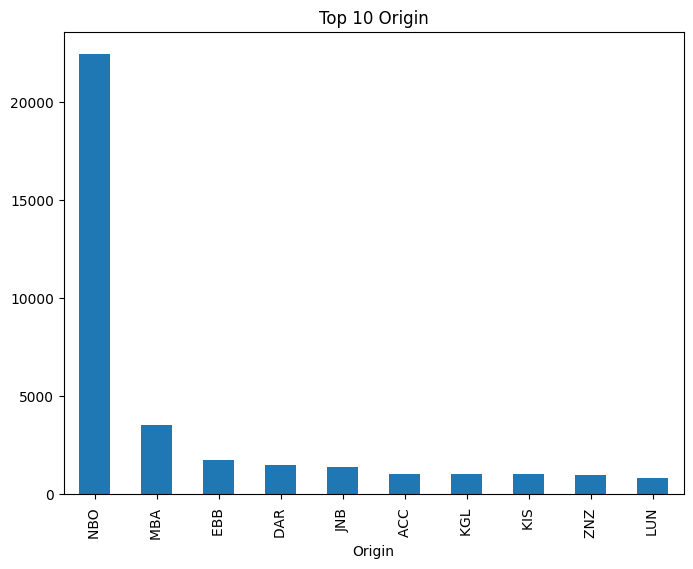

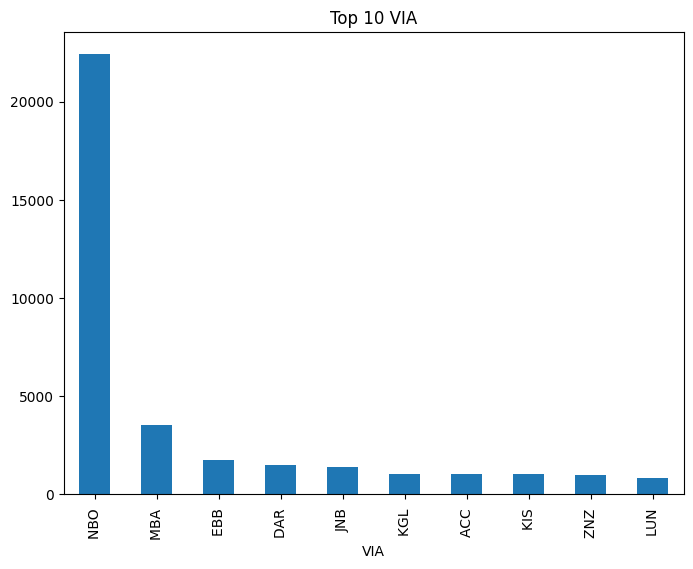

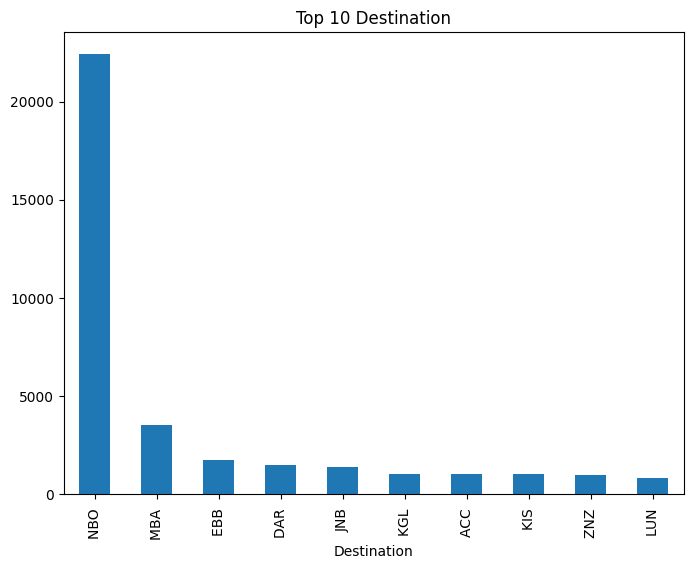

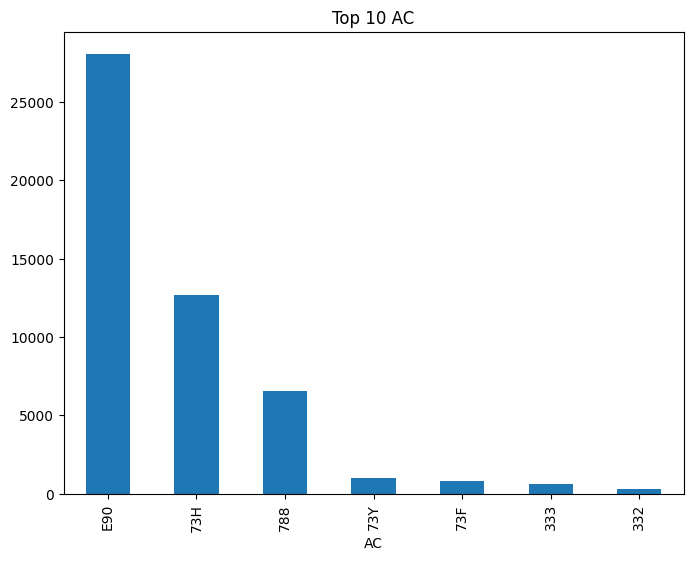

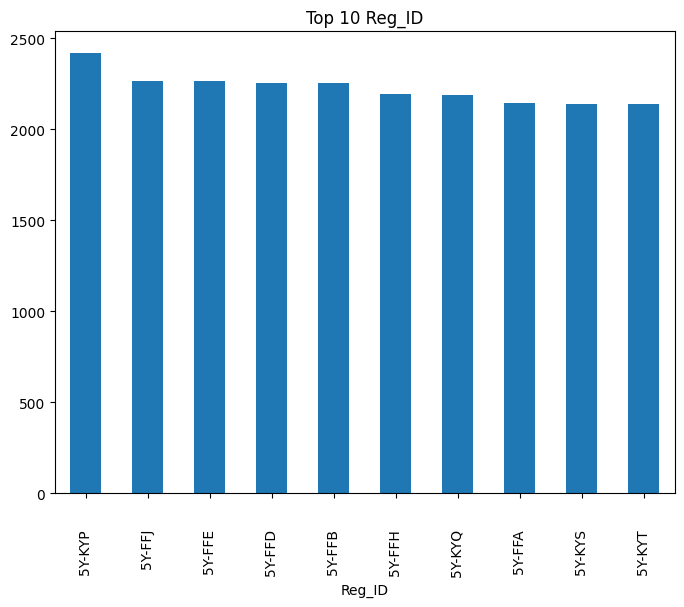

In [ ]:
plot_univariate('Origin')
plot_univariate('VIA')
plot_univariate('Destination')
plot_univariate('AC')
plot_univariate('Reg_ID')

The most popular airport as an origin, turnaround airport and destination is NBO(Nairobi) this is because the network structure of the airline used in this analysis is a hub and spoke meaning that all flight originate and terminate their journeys in the  hub with the other destinations described as spokes.

The most used aircraft model is the Embrear(E90) that usually operates short haul flights that are more frequent than the long haul flights.

The most common plate number is the 5Y-KYP followed by the 5Y-FF series that are usually given to E90s.

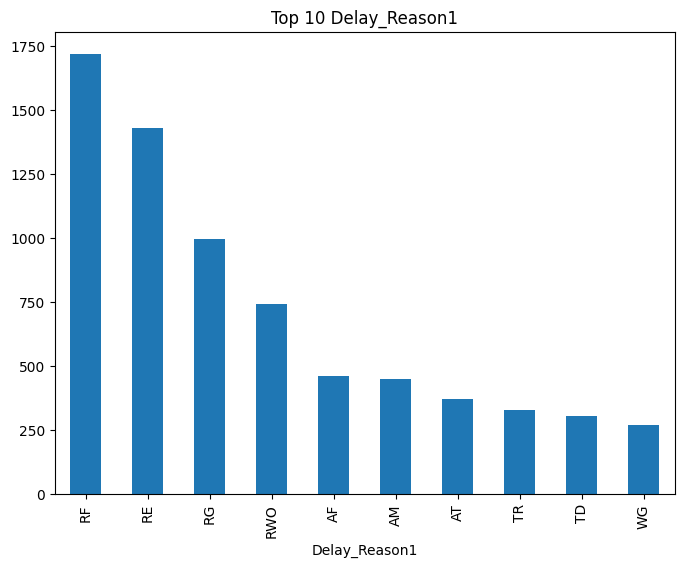

In [ ]:
plot_univariate('Delay_Reason1')

The most common delay type is reactionary (Those that start with R) meaning that most are caused as a consequence of some other delay that could be baggage delays, check in delays or even crew delays. The next part are airport management or airtraffic regulations/rules delays(those starting with As) such as closed runways, airport staff shortage etc. The Ts(Technical or equipment related follow in close beind.  

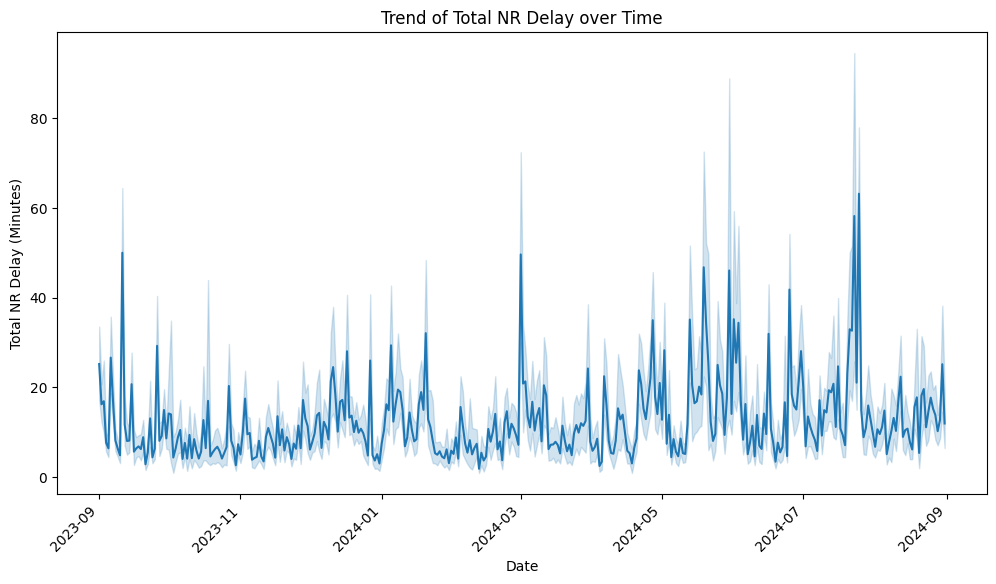

In [ ]:
df6 = df5.copy()

plt.figure(figsize=(12, 6))

df6['Total_NR_Delay_Minutes'] = df6['Total_NR_Delay'].apply(
    lambda x: x.hour * 60 + x.minute if x is not None else None  # Handle potential None values
)
sns.lineplot(x=df6['Date'], y=df6['Total_NR_Delay_Minutes']) # Plot using the new numerical column
plt.title('Trend of Total NR Delay over Time')
plt.xlabel('Date')
plt.ylabel('Total NR Delay (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see a huge spike in the delays arounfd August which is around summer peak where alot of travel into and out of the countries operated by the airline happens. Therefore we expect to find alot of the delays here as opposed to offpeak time like late January to early February. However I also expected to see a higher peak in December as it is the winter peak high season. This may have been due to well  

In [ ]:
df6.shape

(50049, 24)

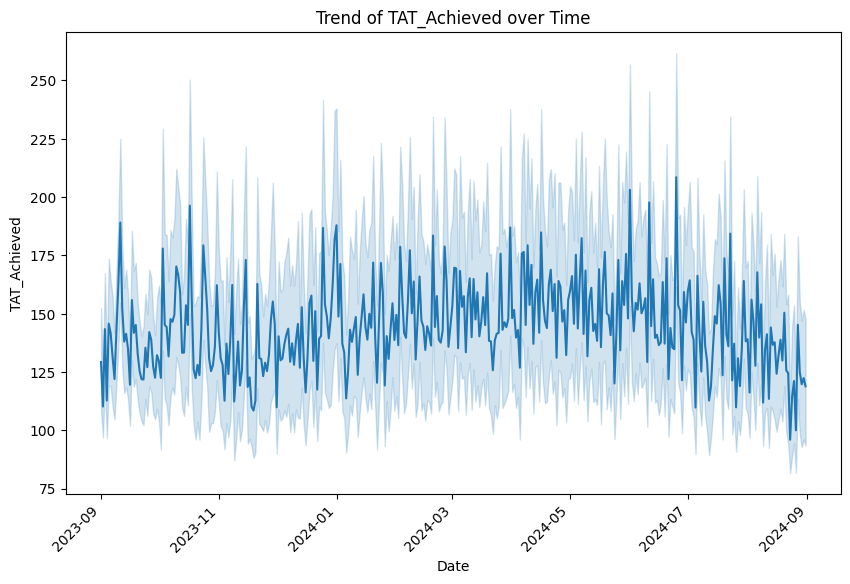

In [ ]:
plt.figure(figsize=(10, 6))

df6['TAT_Achieved_Minutes'] = df6['TAT_Achieved'].apply(
    lambda x: x.hour * 60 + x.minute if x is not None else None  # Handle potential None values
)


sns.lineplot(x=df6['Date'], y=df6['TAT_Achieved_Minutes'])
plt.title('Trend of TAT_Achieved over Time')
plt.xlabel('Date')
plt.ylabel('TAT_Achieved')
plt.xticks(rotation=45, ha='right')
plt.show()

The turn around time seems to oscillate around the same 150 minutes with the peaks showing the delays, a trend mirroring the peaks in the total delays.

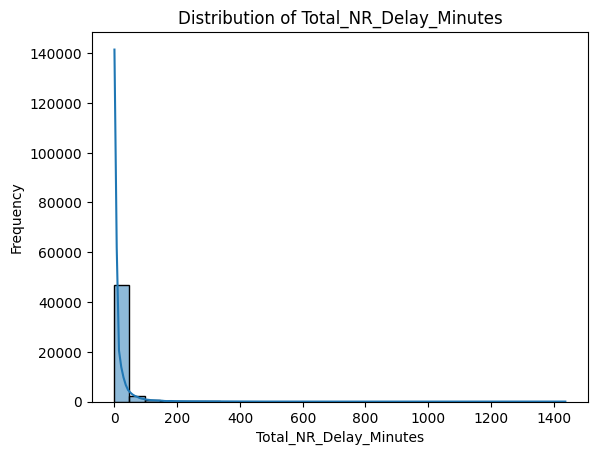

In [ ]:
sns.histplot(df6['Total_NR_Delay_Minutes'], bins=30, kde=True)
plt.title('Distribution of Total_NR_Delay_Minutes')
plt.xlabel('Total_NR_Delay_Minutes')
plt.ylabel('Frequency')
plt.show()

Most delays seem to be under 50 minutes with some intances of very high deays, which causes the histogram to be right-scewed.

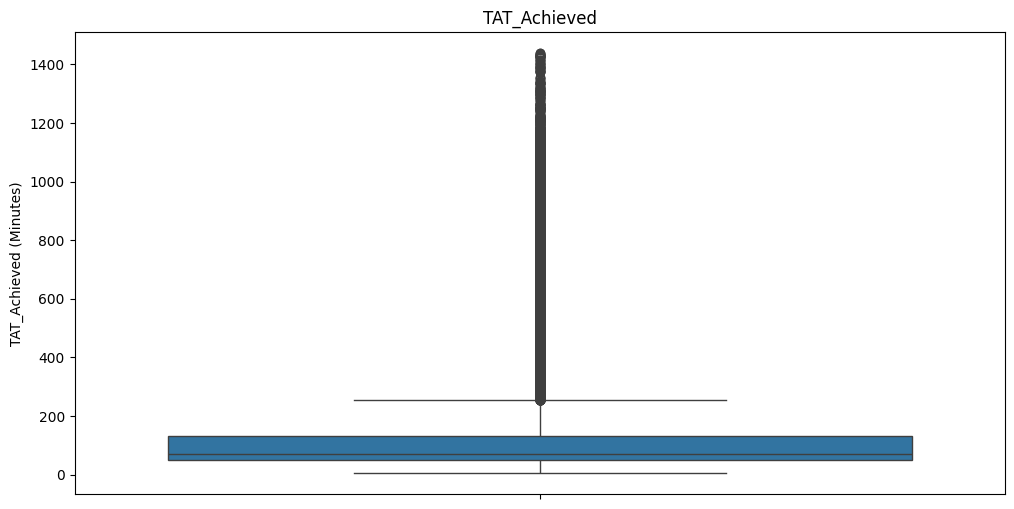

In [ ]:
df6['TAT_Achieved_Minutes'] = df6['TAT_Achieved'].apply(
    lambda x: x.hour * 60 + x.minute if x is not None else None  # Handle potential None values
)

plt.figure(figsize=(12,6))
sns.boxplot(y='TAT_Achieved_Minutes', data=df6)
plt.title('TAT_Achieved')
plt.ylabel('TAT_Achieved (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

The TAT has alot of outliers. Some spanning over 1400 minutes(almost a full day). This might be an instance of an aircraft eqipment issue

In [ ]:
#function to convert time to minutes
def time_to_minutes(time_obj):
    if pd.notnull(time_obj):  # Check for non-null values
        return time_obj.hour * 60 + time_obj.minute
    return None

#columns to process
time_columns = ['TAT_Achieved', 'TAT_Min', 'TAT_Sched', 'Total_NR_Delay',
                'Delay_Time1', 'Delay_Time2', 'Delay_Time3']

# Apply
for col in time_columns:
    df6[f'{col}_Minutes'] = df6[col].apply(time_to_minutes)


<Figure size 1500x1500 with 0 Axes>

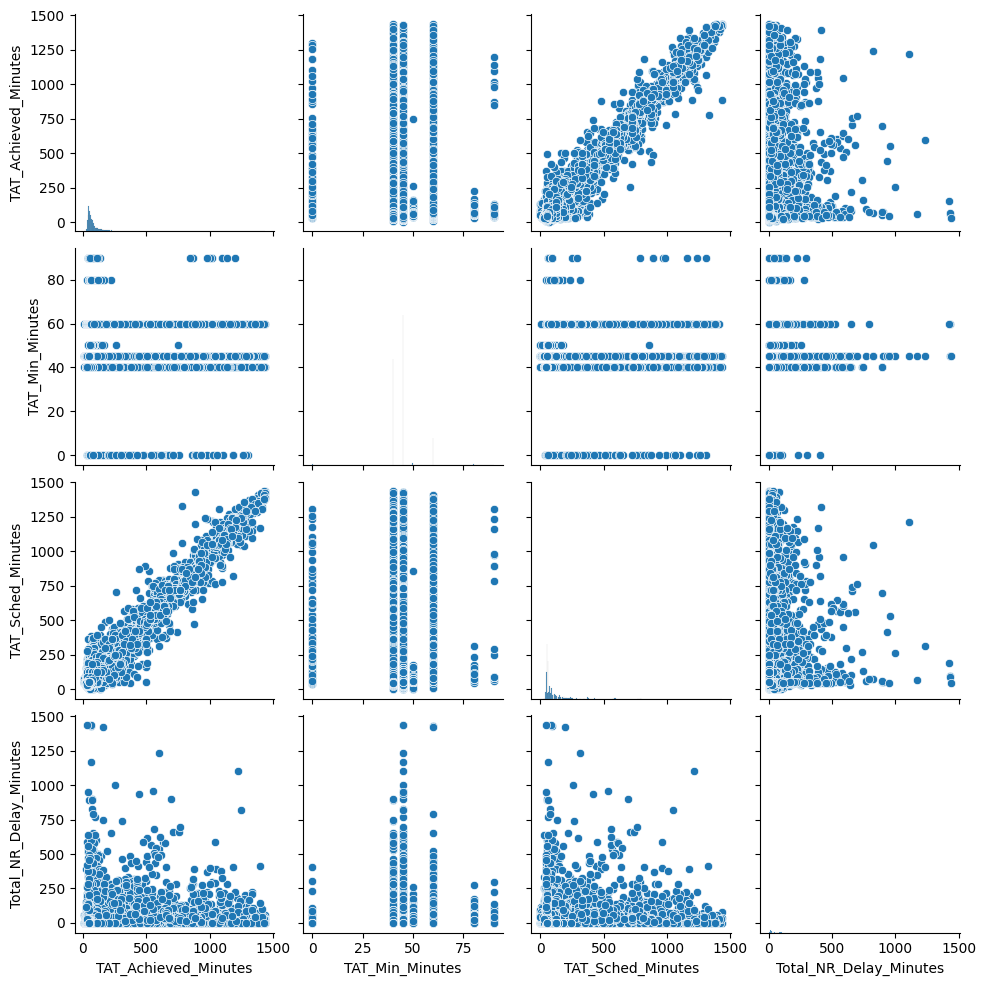

In [ ]:
# Select the columns for the pairplot
columns_for_pairplot = ['TAT_Achieved_Minutes', 'TAT_Min_Minutes', 'TAT_Sched_Minutes', 'Total_NR_Delay_Minutes',]


plt.figure(figsize=(15, 15))  # Adjust figure size as needed
sns.pairplot(df6[columns_for_pairplot].dropna())  # Drop rows with NaN values in any of the columns
plt.show()

There is a strong linear relationship between TAT_Achieved_Minutes and TAT_Sched_Minutes.
TAT_Min_Minutes seems to have distinct values, indicating predefined operational constraints.
The relationship between Total_NR_Delay_Minutes and other variables appears non-linear, suggesting other factors influence delays.

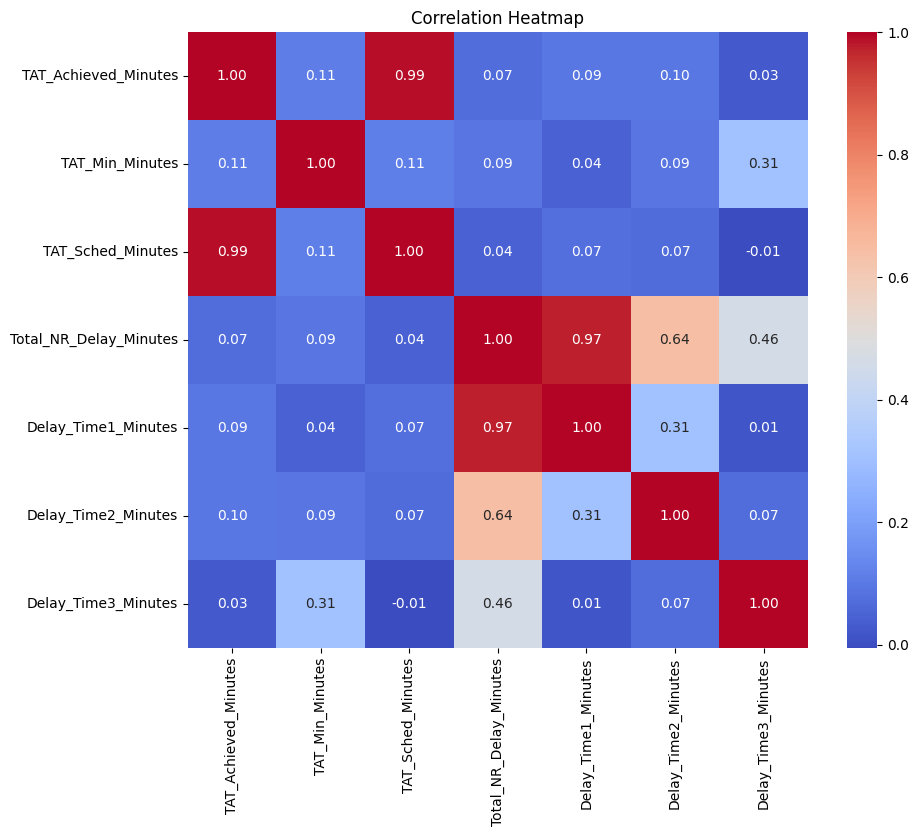

In [59]:
# Select the columns for the heatmap (Minutes)
columns_for_heatmap = ['TAT_Achieved_Minutes', 'TAT_Min_Minutes', 'TAT_Sched_Minutes', 'Total_NR_Delay_Minutes',
                'Delay_Time1_Minutes', 'Delay_Time2_Minutes', 'Delay_Time3_Minutes']

#correlation matrix
correlation_matrix = df6[columns_for_heatmap].corr()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

This heatmap confirms that alot of the time columns do not have a strong relationship with the total delays, thus indicating other reasons seem to influence the delays

In [ ]:
df6.columns

Index(['Date', 'Origin', 'VIA', 'Destination', 'Flight_No', 'AC', 'Reg_ID',
       'Sched_ARR', 'Sched_DEP', 'Actual_ARR', 'Actual_DEP', 'TAT_Min',
       'TAT_Sched', 'TAT_Achieved', 'Total_NR_Delay', 'Delay_Time1',
       'Delay_Reason1', 'Delay_Time2', 'Delay_Reason2', 'Delay_Time3',
       'Delay_Reason3', 'day', 'month', 'year', 'days_SA&SD', 'days_AA&SD',
       'days_AD&SD', 'Total_NR_Delay_Minutes', 'TAT_Achieved_Minutes',
       'TAT_Min_Minutes', 'TAT_Sched_Minutes', 'Delay_Time1_Minutes',
       'Delay_Time2_Minutes', 'Delay_Time3_Minutes'],
      dtype='object')

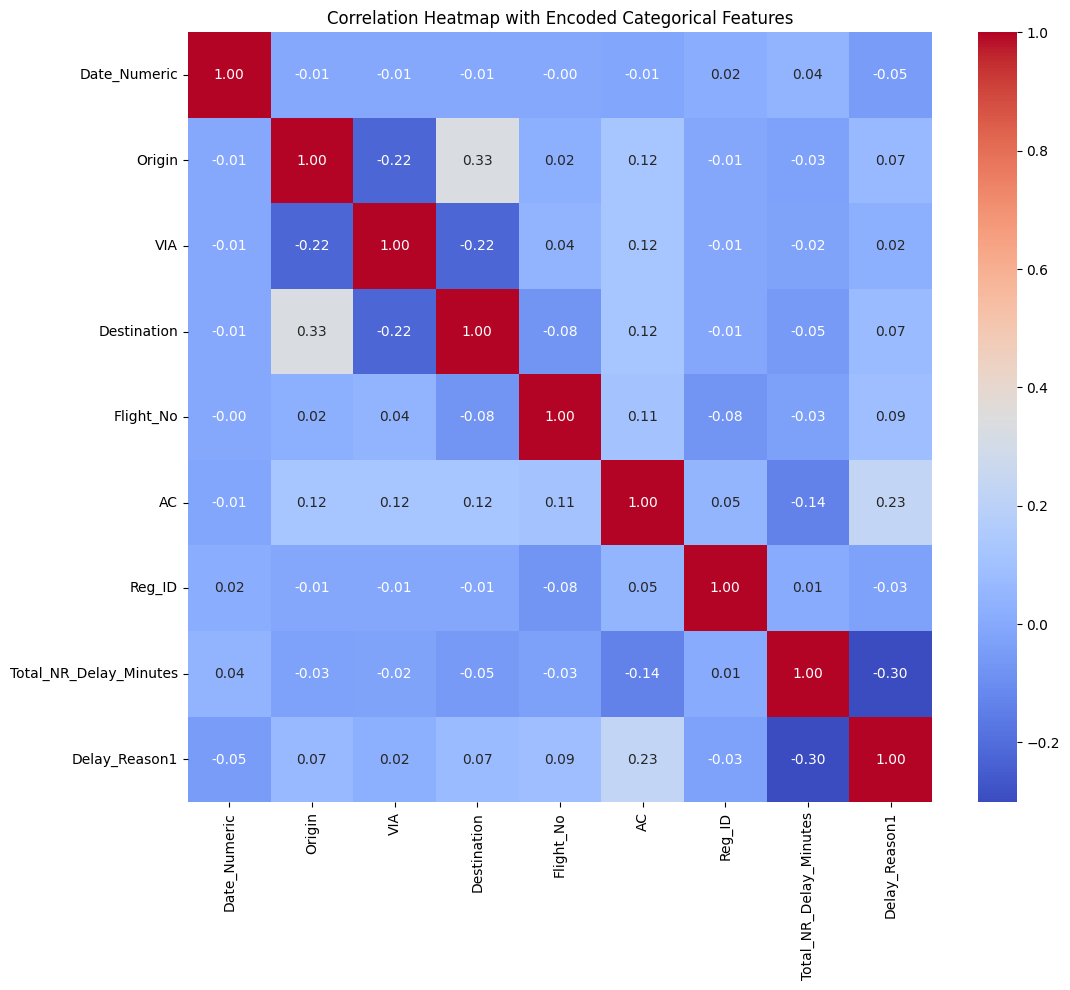

In [ ]:
from sklearn.preprocessing import LabelEncoder
#correlation with categorical column
columns_for_heatmap = ['Date', 'Origin', 'VIA', 'Destination', 'Flight_No', 'AC', 'Reg_ID', 'Total_NR_Delay_Minutes',
                'Delay_Reason1']

# Create a copy
df6_encoded = df6.copy()


label_encoder = LabelEncoder()

# Encode categorical columns
for column in ['Origin', 'VIA', 'Destination', 'Flight_No', 'AC', 'Reg_ID', 'Delay_Reason1']:
    df6_encoded[column] = label_encoder.fit_transform(df6_encoded[column])

# Convert date
df6_encoded['Date'] = pd.to_datetime(df6_encoded['Date'])
df6_encoded['Date_Numeric'] = (df6_encoded['Date'] - df6_encoded['Date'].min()).dt.days

# Use the encoded columns
columns_for_heatmap_encoded = ['Date_Numeric', 'Origin', 'VIA', 'Destination', 'Flight_No', 'AC', 'Reg_ID', 'Total_NR_Delay_Minutes', 'Delay_Reason1']
correlation_matrix = df6_encoded[columns_for_heatmap_encoded].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Encoded Categorical Features')
plt.show()

Here we can see that AC (Aircraft type has a higher correlation with both delay rason 1 and total delay minutes. This probably means that alot of the aircrafts of similar models seem to be delayed for the same reason.

#MACHINE LEARNING

#Feature Importance

In [88]:
df7 = df6.copy()
df7.head(5)

,Date,Origin,VIA,Destination,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,Actual_DEP,...,day,month,year,Total_NR_Delay_Minutes,TAT_Achieved_Minutes,TAT_Min_Minutes,TAT_Sched_Minutes,Delay_Time1_Minutes,Delay_Time2_Minutes,Delay_Time3_Minutes
0,2024-04-18,NBO,AAN,NBO,333,9H-HFI,NaT,11:00:00,NaT,13:46:00,...,18,4,2024,166.0,NaN,45.0,NaN,166.0,NaN,NaN
1,2023-09-02,NBO,ABJ,DSS,73H,5Y-CYE,11:20:00,12:20:00,11:44:00,13:00:00,...,02,9,2023,40.0,76.0,45.0,60.0,40.0,NaN,NaN
2,2023-09-02,DSS,ABJ,NBO,73H,5Y-CYE,19:20:00,20:20:00,19:58:00,21:23:00,...,02,9,2023,23.0,85.0,45.0,60.0,23.0,NaN,NaN
3,2023-09-05,NBO,ABJ,DSS,73H,5Y-CYD,11:20:00,12:20:00,11:42:00,12:46:00,...,05,9,2023,0.0,64.0,45.0,60.0,NaN,NaN,NaN
4,2023-09-05,DSS,ABJ,NBO,73H,5Y-CYD,19:20:00,20:20:00,19:40:00,20:52:00,...,05,9,2023,25.0,72.0,45.0,60.0,19.0,6.0,NaN


In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

df7 = df7[['Date', 'Origin', 'VIA', 'Destination', 'AC', 'Reg_ID',
       'Sched_ARR', 'Sched_DEP', 'Actual_ARR', 'Actual_DEP', 'TAT_Achieved', 'day', 'month', 'year', 'Total_NR_Delay_Minutes', 'TAT_Achieved_Minutes',
       'Delay_Time1_Minutes',
       'Delay_Time2_Minutes', 'Delay_Time3_Minutes']]

df7['Week'] = df7['Date'].dt.isocalendar().week
df7['Sched_DEP'] = pd.to_datetime(df7['Sched_DEP'], format='%H:%M:%S', errors='coerce').dt.time

# Define the desired class order
tail_order = ['5Y-KZG      ', '5Y-KZH      ', '5Y-FFC      ', '5Y-KZC      ',
       '5Y-KZF      ', '5Y-FFG      ', '5Y-KZA      ', '5Y-KZD      ',
       '5Y-FFH      ', '5Y-FFE      ', '5Y-FFK      ', '5Y-KZJ      ',
       '5Y-CYE      ', '5Y-FFB      ', '5Y-FFD      ', '5Y-FFA      ',
       '5Y-FFJ      ', '5Y-KZB      ', '5Y-KYQ      ', '5Y-KYF      ',
       '5Y-KZE      ', '5Y-KCB      ', '5Y-CYC      ', '5Y-KCA      ',
       '5Y-KYD      ', '5Y-CYB      ', '5Y-KYT      ', '5Y-KYE      ',
       '5Y-KYP      ', '5Y-KQC      ', '5Y-CYD      ', '9H-HFI      ',
       '9H-HFA      ', '5Y-CYA      ', '5Y-KYS      ', '9H-HFJ      ',
       '9H-HFH      ', '5Y-KQD      ']



# Create a categorical type for the Class column with the specified order
df7['Reg_ID'] = pd.Categorical(df7['Reg_ID'], categories=tail_order, ordered=True)

df7 = df7.sort_values(by=['Reg_ID', 'Date', 'Sched_DEP'])

df7.head(15)


<ipython-input-89-84e9e0cb3462>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Week'] = df7['Date'].dt.isocalendar().week
<ipython-input-89-84e9e0cb3462>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Sched_DEP'] = pd.to_datetime(df7['Sched_DEP'], format='%H:%M:%S', errors='coerce').dt.time
<ipython-input-89-84e9e0cb3462>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Date,Origin,VIA,Destination,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,Actual_DEP,TAT_Achieved,day,month,year,Total_NR_Delay_Minutes,TAT_Achieved_Minutes,Delay_Time1_Minutes,Delay_Time2_Minutes,Delay_Time3_Minutes,Week
24709,2023-09-01,CAN,NBO,AMS,788,5Y-KZG,01:55:00,05:35:00,00:43:00,05:24:00,04:41:00,01,9,2023,0.0,281.0,NaN,NaN,NaN,35
2088,2023-09-01,NBO,AMS,NBO,788,5Y-KZG,14:40:00,18:40:00,14:15:00,18:40:00,04:25:00,01,9,2023,0.0,265.0,NaN,NaN,NaN,35
24764,2023-09-02,AMS,NBO,AMS,788,5Y-KZG,03:25:00,05:35:00,03:16:00,05:31:00,02:15:00,02,9,2023,0.0,135.0,NaN,NaN,NaN,35
2089,2023-09-02,NBO,AMS,NBO,788,5Y-KZG,14:40:00,18:35:00,14:12:00,18:28:00,04:16:00,02,9,2023,0.0,256.0,NaN,NaN,NaN,35
24822,2023-09-03,AMS,NBO,LHR,788,5Y-KZG,03:20:00,06:05:00,03:08:00,06:05:00,02:57:00,03,9,2023,0.0,177.0,NaN,NaN,NaN,35
17901,2023-09-03,NBO,LHR,NBO,788,5Y-KZG,15:15:00,17:25:00,15:22:00,17:25:00,02:03:00,03,9,2023,0.0,123.0,NaN,NaN,NaN,35
24884,2023-09-04,LHR,NBO,LHR,788,5Y-KZG,02:15:00,06:05:00,02:20:00,06:04:00,03:44:00,04,9,2023,0.0,224.0,NaN,NaN,NaN,36
17903,2023-09-04,NBO,LHR,NBO,788,5Y-KZG,15:15:00,17:25:00,15:12:00,17:15:00,02:03:00,04,9,2023,0.0,123.0,NaN,NaN,NaN,36
24932,2023-09-05,LHR,NBO,AMS,788,5Y-KZG,02:15:00,05:35:00,02:31:00,05:35:00,03:04:00,05,9,2023,0.0,184.0,NaN,NaN,NaN,36
2092,2023-09-05,NBO,AMS,NBO,788,5Y-KZG,14:40:00,18:40:00,14:09:00,18:53:00,04:44:00,05,9,2023,13.0,284.0,13.0,NaN,NaN,36


In [90]:
df7 = df7.sort_values(by=['Reg_ID', 'Date', 'Sched_DEP'])
df7.head(15)

,Date,Origin,VIA,Destination,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,Actual_DEP,TAT_Achieved,day,month,year,Total_NR_Delay_Minutes,TAT_Achieved_Minutes,Delay_Time1_Minutes,Delay_Time2_Minutes,Delay_Time3_Minutes,Week
24709,2023-09-01,CAN,NBO,AMS,788,5Y-KZG,01:55:00,05:35:00,00:43:00,05:24:00,04:41:00,01,9,2023,0.0,281.0,NaN,NaN,NaN,35
2088,2023-09-01,NBO,AMS,NBO,788,5Y-KZG,14:40:00,18:40:00,14:15:00,18:40:00,04:25:00,01,9,2023,0.0,265.0,NaN,NaN,NaN,35
24764,2023-09-02,AMS,NBO,AMS,788,5Y-KZG,03:25:00,05:35:00,03:16:00,05:31:00,02:15:00,02,9,2023,0.0,135.0,NaN,NaN,NaN,35
2089,2023-09-02,NBO,AMS,NBO,788,5Y-KZG,14:40:00,18:35:00,14:12:00,18:28:00,04:16:00,02,9,2023,0.0,256.0,NaN,NaN,NaN,35
24822,2023-09-03,AMS,NBO,LHR,788,5Y-KZG,03:20:00,06:05:00,03:08:00,06:05:00,02:57:00,03,9,2023,0.0,177.0,NaN,NaN,NaN,35
17901,2023-09-03,NBO,LHR,NBO,788,5Y-KZG,15:15:00,17:25:00,15:22:00,17:25:00,02:03:00,03,9,2023,0.0,123.0,NaN,NaN,NaN,35
24884,2023-09-04,LHR,NBO,LHR,788,5Y-KZG,02:15:00,06:05:00,02:20:00,06:04:00,03:44:00,04,9,2023,0.0,224.0,NaN,NaN,NaN,36
17903,2023-09-04,NBO,LHR,NBO,788,5Y-KZG,15:15:00,17:25:00,15:12:00,17:15:00,02:03:00,04,9,2023,0.0,123.0,NaN,NaN,NaN,36
24932,2023-09-05,LHR,NBO,AMS,788,5Y-KZG,02:15:00,05:35:00,02:31:00,05:35:00,03:04:00,05,9,2023,0.0,184.0,NaN,NaN,NaN,36
2092,2023-09-05,NBO,AMS,NBO,788,5Y-KZG,14:40:00,18:40:00,14:09:00,18:53:00,04:44:00,05,9,2023,13.0,284.0,13.0,NaN,NaN,36


In [91]:
# Calculate Cumulative Delay
df7['Cumulative_Delay'] = df7.groupby(['Reg_ID', 'Date'])['Total_NR_Delay_Minutes'].cumsum()

# Delay Propagation Analysis
df7['Next_Flight_Delay'] = df7.groupby(['Reg_ID'])['Total_NR_Delay_Minutes'].shift(-1)

df7['Propagation_Ratio'] = df7['Next_Flight_Delay'] / df7['Total_NR_Delay_Minutes']

df7.head(5)

<ipython-input-91-3355f6378f5c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df7['Cumulative_Delay'] = df7.groupby(['Reg_ID', 'Date'])['Total_NR_Delay_Minutes'].cumsum()
<ipython-input-91-3355f6378f5c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df7['Next_Flight_Delay'] = df7.groupby(['Reg_ID'])['Total_NR_Delay_Minutes'].shift(-1)


,Date,Origin,VIA,Destination,AC,Reg_ID,Sched_ARR,Sched_DEP,Actual_ARR,Actual_DEP,...,year,Total_NR_Delay_Minutes,TAT_Achieved_Minutes,Delay_Time1_Minutes,Delay_Time2_Minutes,Delay_Time3_Minutes,Week,Cumulative_Delay,Next_Flight_Delay,Propagation_Ratio
24709,2023-09-01,CAN,NBO,AMS,788,5Y-KZG,01:55:00,05:35:00,00:43:00,05:24:00,...,2023,0.0,281.0,NaN,NaN,NaN,35,0.0,0.0,NaN
2088,2023-09-01,NBO,AMS,NBO,788,5Y-KZG,14:40:00,18:40:00,14:15:00,18:40:00,...,2023,0.0,265.0,NaN,NaN,NaN,35,0.0,0.0,NaN
24764,2023-09-02,AMS,NBO,AMS,788,5Y-KZG,03:25:00,05:35:00,03:16:00,05:31:00,...,2023,0.0,135.0,NaN,NaN,NaN,35,0.0,0.0,NaN
2089,2023-09-02,NBO,AMS,NBO,788,5Y-KZG,14:40:00,18:35:00,14:12:00,18:28:00,...,2023,0.0,256.0,NaN,NaN,NaN,35,0.0,0.0,NaN
24822,2023-09-03,AMS,NBO,LHR,788,5Y-KZG,03:20:00,06:05:00,03:08:00,06:05:00,...,2023,0.0,177.0,NaN,NaN,NaN,35,0.0,0.0,NaN


In [93]:
df7_sorted = df7.copy()

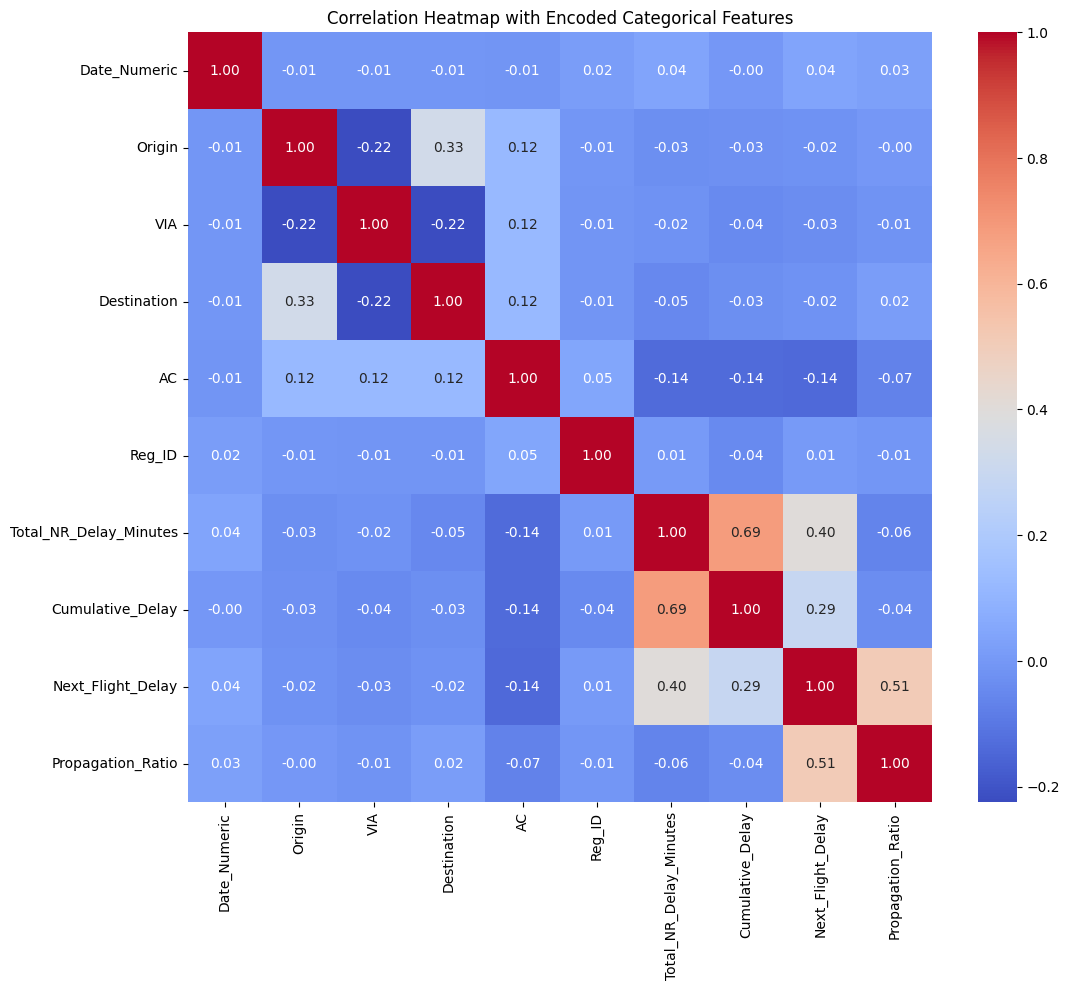

In [76]:
from sklearn.preprocessing import LabelEncoder

columns_for_heatmap = ['Date', 'Origin', 'VIA', 'Destination', 'AC', 'Reg_ID', 'Total_NR_Delay_Minutes',
                'Cumulative_Delay', 'Next_Flight_Delay', 'Propagation_Ratio']

# Create a copy
df7_encoded = df7.copy()


label_encoder = LabelEncoder()

# Encode categorical columns
for column in ['Origin', 'VIA', 'Destination', 'AC', 'Reg_ID']:
    df7_encoded[column] = label_encoder.fit_transform(df7_encoded[column])

# Convert date
df7_encoded['Date'] = pd.to_datetime(df7_encoded['Date'])
df7_encoded['Date_Numeric'] = (df7_encoded['Date'] - df7_encoded['Date'].min()).dt.days

# Use the encoded columns
columns_for_heatmap_encoded = ['Date_Numeric', 'Origin', 'VIA', 'Destination', 'AC', 'Reg_ID', 'Total_NR_Delay_Minutes', 'Cumulative_Delay', 'Next_Flight_Delay', 'Propagation_Ratio' ]
correlation_matrix = df7_encoded[columns_for_heatmap_encoded].corr()
#plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Encoded Categorical Features')
plt.show()

The propagation ratio has a linear relationship with the next flights delay, meaning that if a flight has a guge propagation delay, its next flight has a 50% chance of also having a high delay. the effects of the delay are therefore cascading.

##Modelling

###Flight clustering and delay prediction
Mean Squared Error: 13.707826213786216

R2: 0.9930001166546973


In [137]:
df7 = df7_sorted.copy()


In [138]:

# Replace infinite values with NaN
df7.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values in the feature columns (only numeric columns)
numeric_columns = ['Total_NR_Delay_Minutes', 'TAT_Achieved_Minutes',
                   'Delay_Time1_Minutes', 'Delay_Time2_Minutes', 'Delay_Time3_Minutes']
imputer = SimpleImputer(strategy='mean')
df7[numeric_columns] = imputer.fit_transform(df7[numeric_columns])

# Convert 'Reg_ID' to numerical using Label Encoding
label_encoder = LabelEncoder()
df7['Reg_ID_encoded'] = label_encoder.fit_transform(df7['Reg_ID'])

# One-hot encode categorical features
categorical_features = ['Origin', 'VIA', 'Destination', 'AC']
for feature in categorical_features:
    if feature in df7.columns:
        df7[feature] = df7[feature].astype(str)  # Convert to string
df7 = pd.get_dummies(df7, columns=categorical_features, drop_first=True)

# Drop unnecessary columns (if any)
columns_to_drop = ['Region']  # Add any other unnecessary columns here
df7 = df7.drop(columns=columns_to_drop, errors='ignore')  # Ignore if columns don't exist

# Define features and target variable
X = df7.drop(columns=['Total_NR_Delay_Minutes'])  # Drop target variable
y = df7['Total_NR_Delay_Minutes']

# Ensure all columns in X are numeric
X = X.select_dtypes(include=[np.number])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R2: {r2}')


Feature Importances:
                Feature  Importance
2   Delay_Time1_Minutes    0.950548
3   Delay_Time2_Minutes    0.030275
8     Propagation_Ratio    0.006916
7     Next_Flight_Delay    0.003949
6      Cumulative_Delay    0.003513
4   Delay_Time3_Minutes    0.001834
1  TAT_Achieved_Minutes    0.001483
9        Reg_ID_encoded    0.000754
5                  Week    0.000639
0                  year    0.000090
Mean Squared Error: 13.707826213786216
R2: 0.9930001166546973


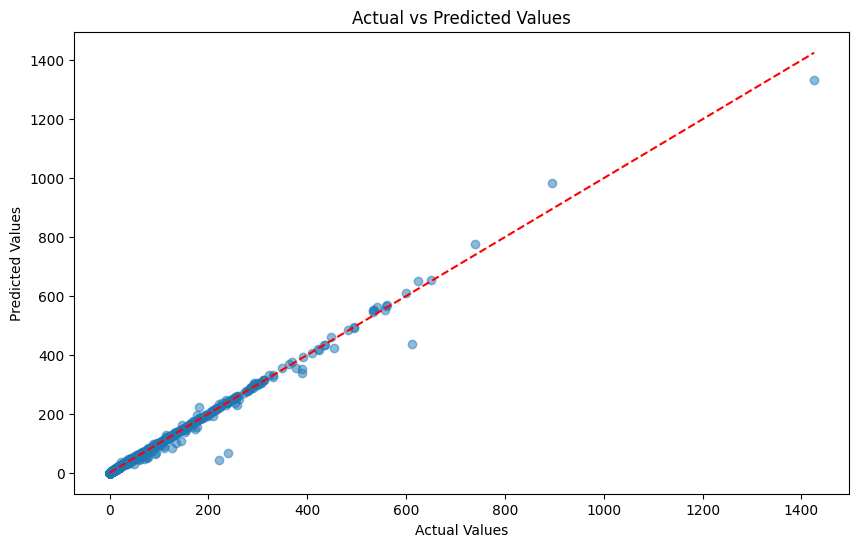

In [140]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [141]:
# Classification of Delay-Prone Aircraft
delay_prone_data = df7.groupby('Reg_ID')['Total_NR_Delay_Minutes'].mean().reset_index()
kmeans = KMeans(n_clusters=5, random_state=42)
delay_prone_data['Delay_Cluster'] = kmeans.fit_predict(delay_prone_data[['Total_NR_Delay_Minutes']])


# Output the results
print("Delay-Prone Aircraft Clusters:")
print(delay_prone_data)

Delay-Prone Aircraft Clusters:
          Reg_ID  Total_NR_Delay_Minutes  Delay_Cluster
0   5Y-KZG                     13.860434              2
1   5Y-KZH                     16.210127              4
2   5Y-FFC                      5.825722              0
3   5Y-KZC                     16.737113              4
4   5Y-KZF                     13.355556              2
5   5Y-FFG                      7.346582              0
6   5Y-KZA                     13.193878              2
7   5Y-KZD                     14.591865              2
8   5Y-FFH                      8.518704              0
9   5Y-FFE                      8.260044              0
10  5Y-FFK                      8.221611              0
11  5Y-KZJ                     20.847528              1
12  5Y-CYE                     20.124764              4
13  5Y-FFB                      6.681899              0
14  5Y-FFD                      8.075831              0
15  5Y-FFA                      6.574160              0
16  5Y-FFJ       

<ipython-input-141-09f9d97dadd2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_prone_data = df7.groupby('Reg_ID')['Total_NR_Delay_Minutes'].mean().reset_index()


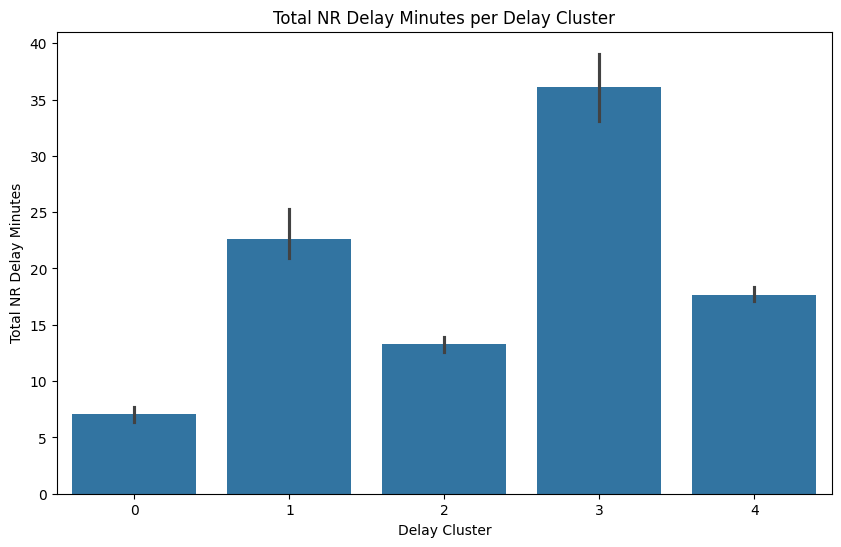

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Delay_Cluster', y='Total_NR_Delay_Minutes', data=delay_prone_data)
plt.title('Total NR Delay Minutes per Delay Cluster')
plt.xlabel('Delay Cluster')
plt.ylabel('Total NR Delay Minutes')
plt.show()

In [145]:
df7.columns

Index(['Date', 'Reg_ID', 'Sched_ARR', 'Sched_DEP', 'Actual_ARR', 'Actual_DEP',
       'TAT_Achieved', 'day', 'month', 'year',
       ...
       'Destination_VFA ', 'Destination_ZNZ ', 'Destination_nan', 'AC_333',
       'AC_73F', 'AC_73H', 'AC_73Y', 'AC_788', 'AC_E90', 'AC_nan'],
      dtype='object', length=245)

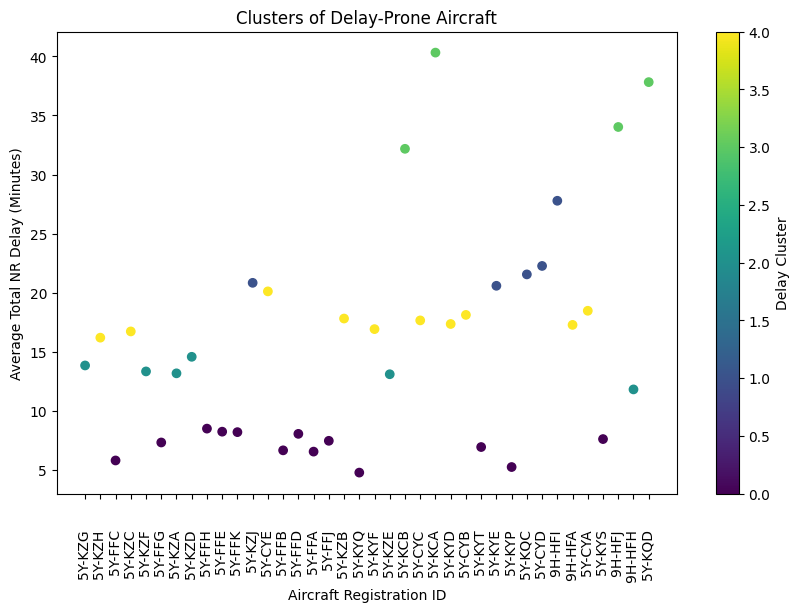

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(delay_prone_data['Reg_ID'], delay_prone_data['Total_NR_Delay_Minutes'], c=delay_prone_data['Delay_Cluster'], cmap='viridis')
plt.xlabel('Aircraft Registration ID')
plt.ylabel('Average Total NR Delay (Minutes)')
plt.title('Clusters of Delay-Prone Aircraft')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.colorbar(label='Delay Cluster')
plt.show()


###RANDOM FOREST REGRESSOR

Mean Squared Error: 49.60248519036675

R^2 Score: 0.9804260778001851

In [129]:
df7 = df7_sorted.copy()

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


features = ['Date', 'Origin', 'VIA', 'Destination', 'AC', 'Reg_ID', 'Sched_ARR',
       'Sched_DEP', 'Actual_ARR', 'Actual_DEP', 'TAT_Achieved', 'day', 'month',
       'year',  'TAT_Achieved_Minutes','Delay_Time1_Minutes', 'Delay_Time2_Minutes', 'Delay_Time3_Minutes',
       'Week', 'Cumulative_Delay', 'Next_Flight_Delay', 'Propagation_Ratio']
target = 'Total_NR_Delay_Minutes'


if not all(feature in df7.columns for feature in features) or target not in df7.columns:
    raise ValueError("Some features or target are missing in the DataFrame.")


df7['day_of_week'] = df7['Date'].dt.dayofweek  # Monday=0, Sunday=6
df7['day_of_month'] = df7['Date'].dt.day
df7['is_weekend'] = df7['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend=1, Weekday=0


df7 = df7.drop(columns=['Date'])

# Check for columns with 'datetime.time' objects and convert them to numerical features
for col in df7.columns:
    if df7[col].dtype == object:
        try:

            df7[col] = pd.to_datetime(df7[col], format='%H:%M:%S', errors='coerce').dt.time
            # Convert 'datetime.time' to total seconds since midnight
            df7[col] = df7[col].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second if pd.notnull(x) else np.nan)
        except (ValueError, AttributeError):
            # otherwise assume it is categorical
            print(f"Column '{col}' contains non-time data. Treating it as categorical.")
            df7[col] = df7[col].astype('category')

# Update the features list to include the new date-related features
features = ['Date', 'Origin', 'VIA', 'Destination', 'AC', 'Reg_ID', 'Sched_ARR',
       'Sched_DEP', 'Actual_ARR', 'Actual_DEP', 'TAT_Achieved', 'day', 'month',
       'year',  'TAT_Achieved_Minutes','Delay_Time1_Minutes', 'Delay_Time2_Minutes', 'Delay_Time3_Minutes',
       'Week', 'Cumulative_Delay', 'Next_Flight_Delay', 'Propagation_Ratio']


categorical_features = ['Origin', 'VIA', 'Destination', 'AC', 'Reg_ID',]
df7[categorical_features] = df7[categorical_features].astype('category')

# Encode categorical features using one-hot encoding
df7_encoded = pd.get_dummies(df7, columns=categorical_features, drop_first=True)

# Update features list to include encoded columns
encoded_features = df7_encoded.columns.tolist()

# Exclude the target column
columns_to_exclude = [target, 'Total_NR_Delay']
encoded_features = [f for f in encoded_features if f not in columns_to_exclude]

# Split the data
X = df7_encoded[encoded_features]
y = df7_encoded[target]

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the target variable 'y'
X = X[y.notna()]
y = y[y.notna()]

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X) #Impute the missing values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

<ipython-input-130-5fb5452fa4f4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['day' 'month']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


RandomForestRegressor(random_state=42)

In [131]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 49.60248519036675
R^2 Score: 0.9804260778001851


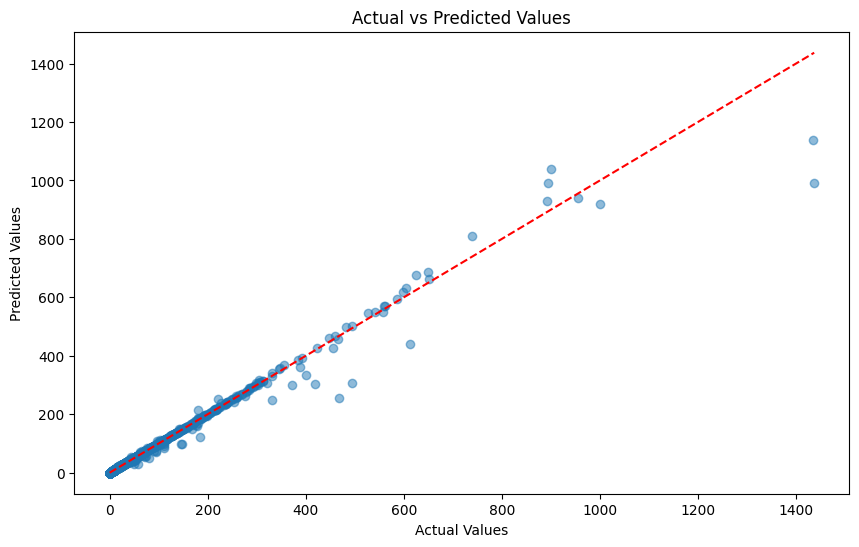

In [132]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

###HistGradientBoostingRegressor
Mean Squared Error: 152.0744263640111

R-squared: 0.9399890352508239

In [119]:
df7 = df7_sorted.copy()

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Mean Squared Error: 152.0744263640111
R-squared: 0.9399890352508239


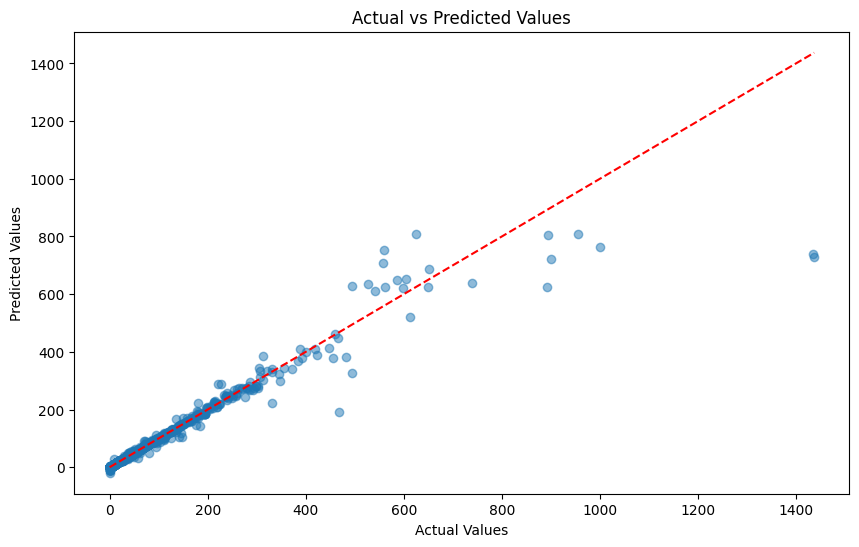

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt



features = ['Date', 'Origin', 'VIA', 'Destination', 'AC', 'Reg_ID', 'Sched_ARR',
       'Sched_DEP', 'Actual_ARR', 'Actual_DEP', 'TAT_Achieved', 'day', 'month',
       'year',  'TAT_Achieved_Minutes','Delay_Time1_Minutes', 'Delay_Time2_Minutes', 'Delay_Time3_Minutes',
       'Week', 'Cumulative_Delay', 'Next_Flight_Delay', 'Propagation_Ratio']
target = 'Total_NR_Delay_Minutes'


if not all(feature in df7.columns for feature in features) or target not in df7.columns:
    raise ValueError("Some features or target are missing in the DataFrame.")


df7['day_of_week'] = df7['Date'].dt.dayofweek  # Monday=0, Sunday=6
df7['day_of_month'] = df7['Date'].dt.day
df7['is_weekend'] = df7['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend=1, Weekday=0


df7 = df7.drop(columns=['Date'])

# Check for columns with 'datetime.time' objects and convert them to numerical features
for col in df7.columns:
    if df7[col].dtype == object:
        try:
            # Attempt to convert the column to datetime.time
            df7[col] = pd.to_datetime(df7[col], format='%H:%M:%S', errors='coerce').dt.time
            # Convert 'datetime.time' to total seconds since midnight
            df7[col] = df7[col].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second if pd.notnull(x) else np.nan)
        except (ValueError, AttributeError):
            # otherwise assume it is categorical
            print(f"Column '{col}' contains non-time data. Treating it as categorical.")
            df7[col] = df7[col].astype('category')

# Update the features list to include the new date-related features
features = ['Date', 'Origin', 'VIA', 'Destination', 'AC', 'Reg_ID', 'Sched_ARR',
       'Sched_DEP', 'Actual_ARR', 'Actual_DEP', 'TAT_Achieved', 'day', 'month',
       'year',  'TAT_Achieved_Minutes','Delay_Time1_Minutes', 'Delay_Time2_Minutes', 'Delay_Time3_Minutes',
       'Week', 'Cumulative_Delay', 'Next_Flight_Delay', 'Propagation_Ratio']


categorical_features = ['Origin', 'VIA', 'Destination', 'AC', 'Reg_ID',]
df7[categorical_features] = df7[categorical_features].astype('category')

# Encode categorical features using one-hot encoding
df7_encoded = pd.get_dummies(df7, columns=categorical_features, drop_first=True)

# Update features list to include encoded columns
encoded_features = df7_encoded.columns.tolist()

# Exclude the target column
columns_to_exclude = [target, 'Total_NR_Delay']
encoded_features = [f for f in encoded_features if f not in columns_to_exclude]

# Split the data
X = df7_encoded[encoded_features]
y = df7_encoded[target]

# Drop rows with NaN values in the target variable 'y'
X = X[y.notna()]
y = y[y.notna()]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()